In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os 

import sys
import pickle
import time

import Alpaga # the full package
importlib.reload(Alpaga) # to make sure you have the good version
from Alpaga import sshg_module as sshg# The code that actually have the function

from scipy.optimize import curve_fit

In [2]:
Alpaga

<module 'Alpaga' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Alpaga\\__init__.py'>

# Data loading from pickles

In [3]:
# For the tutorial: 
import Alpaga.Data_tutorial
Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) # where is stored to tutorial files

WORK_DIR = Dir_tuto_file

# For S polarisation datas

name_save_result = os.path.join(WORK_DIR, 'SSHG/sshg_water_pola_S.p')

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_intensity_S = L_post_prod_load['L_intensity_angle'] # intensity for each angle
L_lambda_0_S = L_post_prod_load['L_lambda_0_angle'] # central wavelength for each angle
L_waist_S = L_post_prod_load['L_waist_angle'] # waist of the gaussian for each angle


# For P polarisation datas

# Note that the path point now to the pickle for P datas
name_save_result = os.path.join(WORK_DIR, 'SSHG/sshg_water_pola_P.p')

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_intensity_P = L_post_prod_load['L_intensity_angle'] #Same as above
L_lambda_0_P = L_post_prod_load['L_lambda_0_angle'] 
L_waist_P = L_post_prod_load['L_waist_angle'] 


# angle transformation from 180 to 360°

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2



Text(0.5, 1.0, '$\\omega_0$ fit parameter found for every polarisation angle')

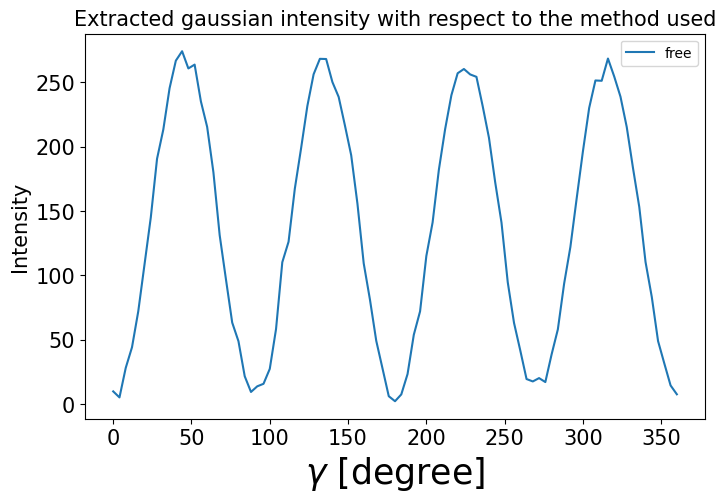

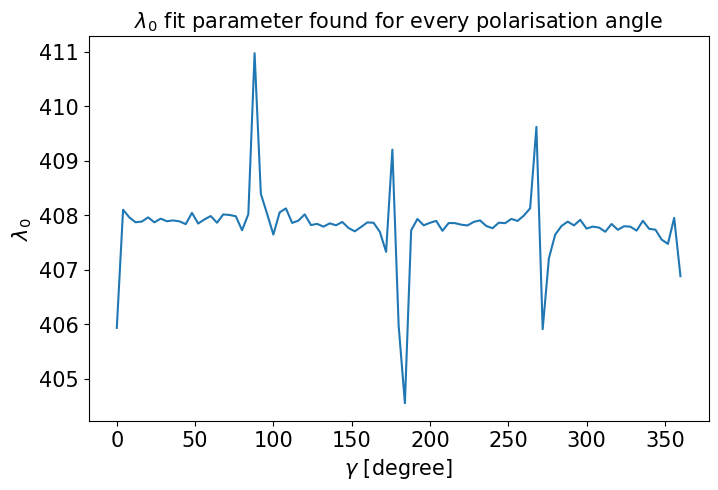

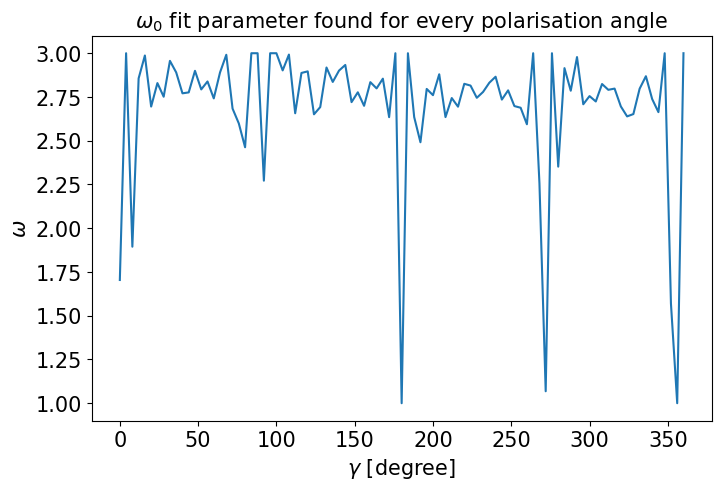

In [4]:
plt.figure(1, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_intensity_S, label='free')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=15)

plt.figure(2, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_lambda_0_S)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\lambda_0$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=15)


plt.figure(3, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_waist_S)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\omega$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=15)

Text(0.5, 1.0, '$\\omega_0$ fit parameter found for every polarisation angle')

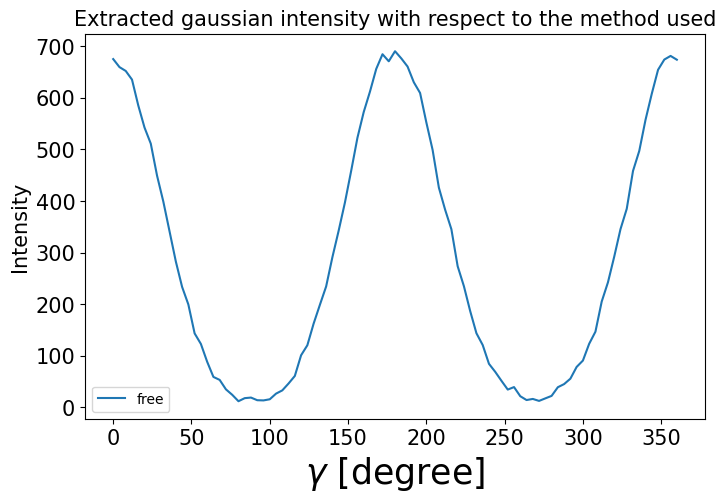

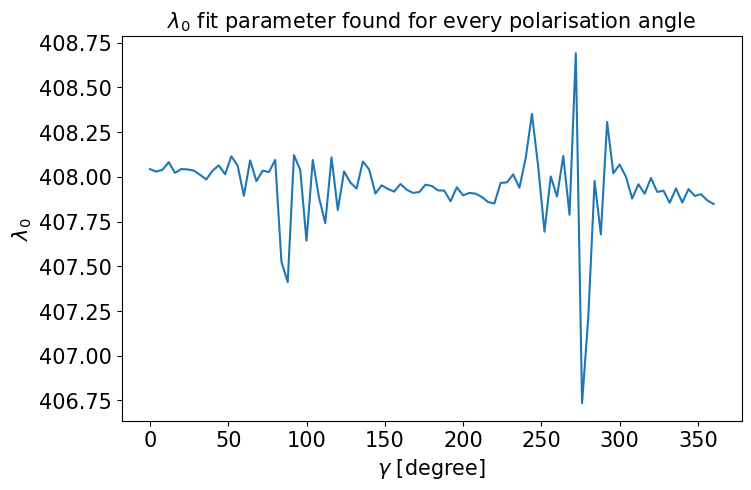

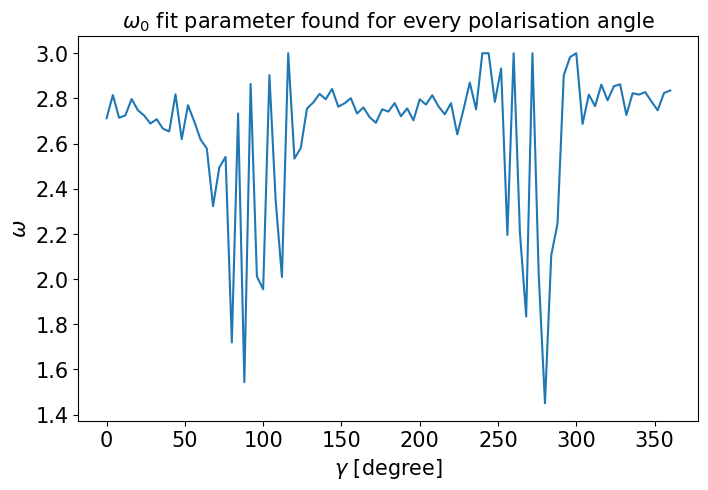

In [5]:
plt.figure(1, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_intensity_P, label='free')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=10)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=15)

plt.figure(2, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_lambda_0_P)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\lambda_0$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=15)


plt.figure(3, figsize=(8, 5))
plt.plot(L_polarisation_angle, L_waist_P)
plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'$\omega$', fontsize=15)
plt.yticks(fontsize=15)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=15)

# Analysis

In [7]:
#### Analyse SSHG ####

# In this example, we study an interface with a reflexion set-up at 70°

incidence_angle = 70 # Incidence angle of the setup
n1_fonda=1           # refractive index of 1st medium at fondamental wavelength 
n2_fonda=1.339       # refractive index of 2nd medium at harmonic wavelength 
n1_harmo=1           # refractive index of 1st medium at fondamental wavelength 
n2_harmo=1.329       # refractive index of 2nd medium at harmonic wavelength 

#vous pouvez obtenir les coefficient ai sans besoin de données à traiter par la fonction :
# ai = coeff(angle_incidence, n1_fonda, n2_fonda, n1_harmo, n2_harmo)

#L_angles in degree

ai, chi = sshg.analyse_polarization_SSHG(incidence_angle, n1_fonda, n2_fonda, n1_harmo, n2_harmo, L_polarisation_angle, L_intensity_S, L_intensity_P, XXZ=False)

# Outputs of this fonction are :
# ai coefficient and fitted chi values

# Inputs are :
# geometric parameters and refractive index values as above
# list of polarisation angles and relative intensity in P and S polarisation configuration

# WARNING : number of elements for these three lists must be equal !!!

# If you have a S polarisation flat and noisy, one can fixe the value of chi_XXZ to/near zero and allows a fit only on chi_ZXX an chi_ZZZ.
# For reminder, only chi_XXZ is necessary to fit S polarisation.
# To do so, change the XXZ=False parameter to, for example for a flat S curve, XXZ=0.1. It's also necessary to avoid XXZ=0 to assure that the function don't bug.
# If the parameter XXZ stay at False, chi_XXZ will be fit on S curve datas.


# Results

In [8]:
# Here we presents results
# Outputs of the function as 2 parameter sets cause of symmetry of theoritical function.

print('1st parameter set :' ,end='\n')
print('chi_XXZ =' ,chi[0] ,end='\n')
print('chi_ZXX =' ,chi[1] ,end='\n')
print('chi_ZZZ =' ,chi[2] ,end='\n')
print('ZXX/XXZ ratio =',chi[1]/chi[0],end='\n')
print('XXZ/ZZZ ratio =',chi[0]/chi[2],end='\n')
print('ZXX/ZZZ ratio =',chi[1]/chi[2],end='\n\n')


print('2nd parameter set :' ,end='\n')
print('chi_XXZ =' ,chi[3] ,end='\n')
print('chi_ZXX =' ,chi[4] ,end='\n')
print('chi_ZZZ =' ,chi[5] ,end='\n')
print('ZXX/XXZ ratio =',chi[4]/chi[3],end='\n')
print('XXZ/ZZZ ratio =',chi[3]/chi[5],end='\n')
print('ZXX/ZZZ ratio =',chi[4]/chi[5],end='\n\n')

# One can check 45° polarisation curve to determine the usefull set.

1st parameter set :
chi_XXZ = 46.286047005350596
chi_ZXX = -11.066637852424083
chi_ZZZ = -20.13410586768739
ZXX/XXZ ratio = -0.2390923089877344
XXZ/ZZZ ratio = -2.29888763422237
ZXX/ZZZ ratio = 0.5496463525695766

2nd parameter set :
chi_XXZ = 46.286047005350596
chi_ZXX = 11.066637852424083
chi_ZZZ = 111.6961984129378
ZXX/XXZ ratio = 0.2390923089877344
XXZ/ZZZ ratio = 0.41439232187860453
ZXX/ZZZ ratio = 0.099078017064744



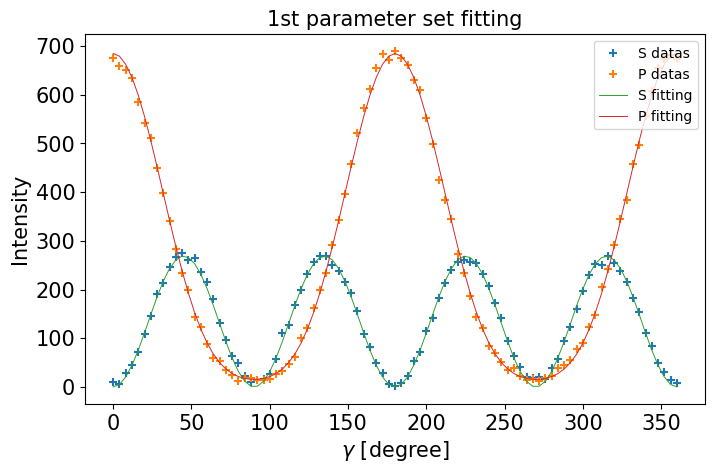

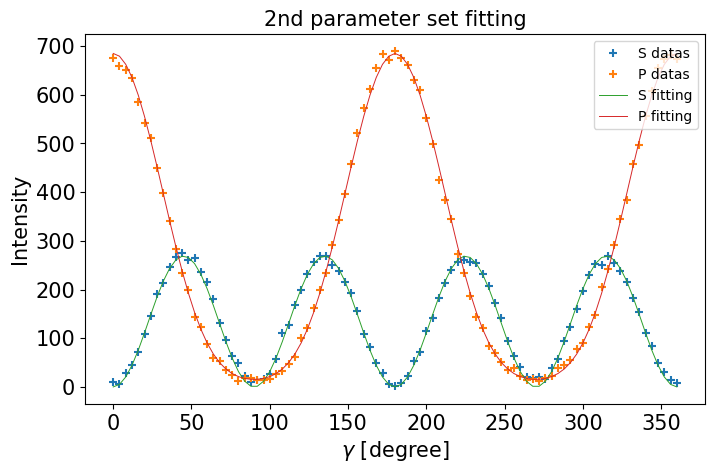

In [14]:
L_angles_rad = [i*np.pi/180 for i in L_polarisation_angle]

# Here we show how one can fit experimental datas using sshg.fit_polaS and sshg.fit_polaP function.
# We also show that, if you only watch P and S polarisation curves, both sets are equivalent.

plt.figure(1,figsize =(8,4.8))

plt.plot(L_polarisation_angle,L_intensity_S,'+',mew=1.5, label ='S datas')
plt.plot(L_polarisation_angle,L_intensity_P,'+',mew=1.5, label ='P datas')
plt.plot(L_polarisation_angle,sshg.fit_polaS(L_angles_rad,chi[0],ai),lw=0.7, label ='S fitting')
plt.plot(L_polarisation_angle,sshg.fit_polaP(L_angles_rad,chi[0],chi[1],chi[2],ai),lw=0.7, label ='P fitting')

plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.title('1st parameter set fitting', fontsize=15)
plt.legend(loc=1)


plt.figure(2,figsize =(8,4.8))

plt.plot(L_polarisation_angle,L_intensity_S,'+',mew=1.5, label ='S datas')
plt.plot(L_polarisation_angle,L_intensity_P,'+',mew=1.5, label ='P datas')
plt.plot(L_polarisation_angle,sshg.fit_polaS(L_angles_rad,chi[3],ai),lw=0.7, label ='S fitting')
plt.plot(L_polarisation_angle,sshg.fit_polaP(L_angles_rad,chi[3],chi[4],chi[5],ai),lw=0.7, label ='P fitting')

plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)
plt.title('2nd parameter set fitting', fontsize=15)
plt.legend(loc=1)


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300'),
  Text(0, 350.0, '350')])

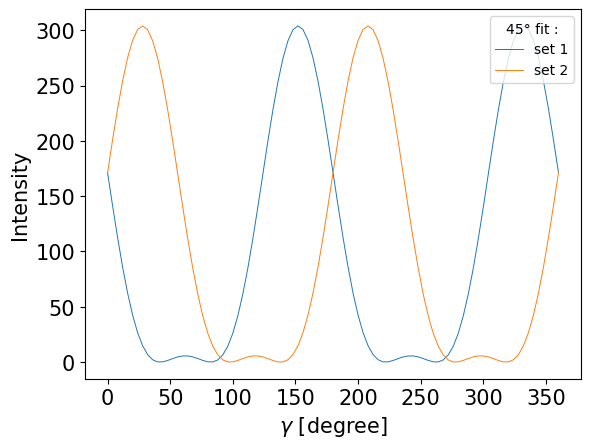

In [16]:
L_angles_rad = [i*np.pi/180 for i in L_polarisation_angle]

# We present here how to fit 45° polarisation set and effect of the set of parameters.
# Measure of 45° polarisation curve can distinguish between both sets.

plt.figure()

plt.plot(L_polarisation_angle,sshg.fit_pola45(L_angles_rad,chi[0],chi[1],chi[2],ai),lw=0.7)
plt.plot(L_polarisation_angle,sshg.fit_pola45(L_angles_rad,chi[3],chi[4],chi[5],ai),lw=0.7)

plt.legend(['set 1','set 2'],title='45° fit :',loc=1)

plt.xlabel(r'$\gamma$ [degree]', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(r'Intensity', fontsize=15)
plt.yticks(fontsize=15)